# SAMPLING

The original dataset is from [Kaggle 's "100,000 UK Used Car Data Set"](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?select=merc.csv)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
cars = pd.read_csv('../datasets/uk_car_sales_1996_2020.csv')

# check dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99178 entries, 0 to 99177
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          99178 non-null  object 
 1   model         99178 non-null  object 
 2   year          99178 non-null  int64  
 3   price         99178 non-null  int64  
 4   transmission  99178 non-null  object 
 5   mileage       99178 non-null  int64  
 6   fuelType      99178 non-null  object 
 7   mpg           99178 non-null  float64
 8   engineSize    99178 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 6.8+ MB


In [3]:
# display first 5 rows
cars.head()

,make,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


# Random Sampling

In [4]:
# create a subset, first 1000 rows and display the histogram
cars_sample_first_1000 = cars[:1000]

# take a random sample of the data
cars_sample_random_1000 = cars.sample(n=1000, random_state=21) # random_state ensure reproducability of the results

# calculate means
pop_mean = round(cars['price'].mean(),2)
sample_mean = round(cars_sample_first_1000['price'].mean(),2)
sample_mean_random = round(cars_sample_random_1000['price'].mean(),2)

# display sample mean
print(f"Population Mean: {pop_mean} \n\
Sample Mean (First 1000): {sample_mean} \n\
Sample Mean (Random): {sample_mean_random}")

Population Mean: 16805.42 
Sample Mean (First 1000): 23012.5 
Sample Mean (Random): 16804.94


Note: The reason why the sample mean is higher for the First 1000 is because the sample consists of 'only' Audi models, which is a high end car brand.

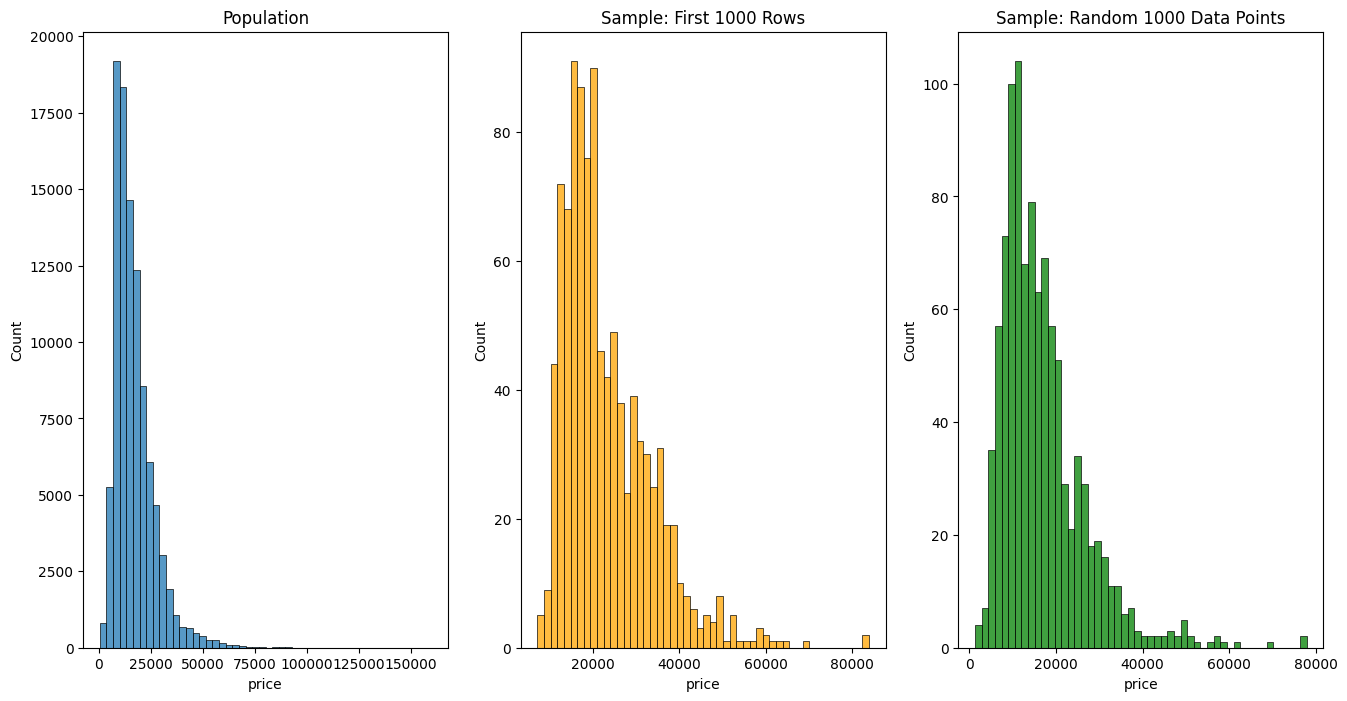

In [5]:
# display histograms for 'price' column
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

sns.histplot(x='price', data=cars,bins=50, ax=axes[0])
axes[0].set_title('Population')
sns.histplot(x='price', data=cars_sample_first_1000,bins=50, color='orange', ax=axes[1])
axes[1].set_title('Sample: First 1000 Rows')
sns.histplot(x='price', data=cars_sample_random_1000,bins=50, color='g', ax=axes[2])
axes[2].set_title('Sample: Random 1000 Data Points')
plt.show()


In [6]:
fig.savefig("./pop_f1000_r1000_sampling.jpg")

# Systematic Sampling

In [7]:
# define an interval
sample_size = 1000
pop_size = len(cars)
k_th_value = pop_size // sample_size # or interval
print(k_th_value)
# 99

99


NOTE: Systematic sampling is only safe if we don't see a pattern in the scatter plot!

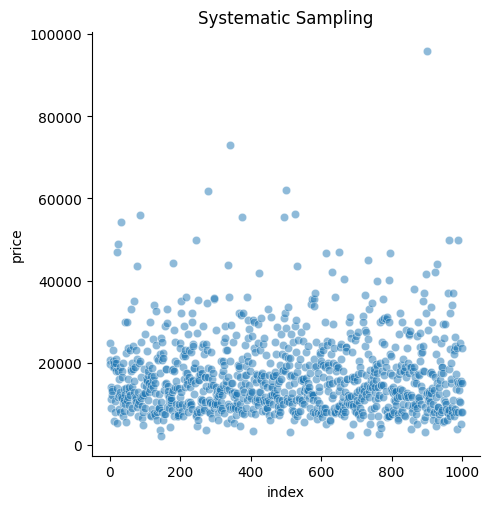

In [8]:
# shuffle the dataset to avoid getting caught in a pattern
cars_shuffled = cars.sample(frac=1)

# take a sample 
cars_sample_systematic_shuffled = cars_shuffled[::k_th_value]

# re-index the sample
cars_sample_systematic_shuffled = cars_sample_systematic_shuffled.reset_index(drop=True).reset_index()

# display scatter plot
g = sns.relplot(data = cars_sample_systematic_shuffled, x='index',y='price', kind='scatter', alpha=0.5) 
plt.title('Systematic Sampling')
g.savefig("systematic_sampling.jpg") 
plt.show()

In [9]:
# calculate sample mean
sample_mean_systematic = round(cars_sample_systematic_shuffled['price'].mean(),2)

# display means
print(f"Population Mean: {pop_mean} \n\
Sample Mean (Systematic): {sample_mean_systematic}")

Population Mean: 16805.42 
Sample Mean (Systematic): 16725.09


# Stratified Sampling

In [10]:
# create a dataframe with top brands
cars_top_counts = cars['make'].value_counts().reset_index()

# filter brands with more than 12500 datapoints
cars_top_counts = cars_top_counts[cars_top_counts['count']>12500]

# extract top brands
top_brands = list(cars_top_counts['make'].values)

# sub-set cars dataframe
cars_top = cars[cars['make'].isin(top_brands)]

print(cars.shape,cars_top.shape)

# diplay propotions of makes/brands
cars_top['make'].value_counts(normalize=True)

(99178, 9) (59864, 9)


make
Ford          0.300047
Volkswagen    0.253157
Vauxhall      0.227683
Mercedes      0.219113
Name: proportion, dtype: float64

In [11]:
# create proportional stratified sample with 10% sampling rate per make/brand
cars_sample_strat = cars_top.groupby("make").sample(frac=0.1, random_state=21)
print(cars_top.shape,cars_sample_strat.shape)
cars_sample_strat['make'].value_counts(normalize=True)

(59864, 9) (5987, 9)


make
Ford          0.299983
Volkswagen    0.253215
Vauxhall      0.227660
Mercedes      0.219141
Name: proportion, dtype: float64

In [12]:
# create equal count stratified sample with n=1000 samples from each make/brand
cars_sample_strat_eq_cnt = cars_top.groupby("make").sample(n=1000, random_state=21)
print(cars_top.shape,cars_sample_strat_eq_cnt.shape)
cars_sample_strat_eq_cnt['make'].value_counts(normalize=True)

(59864, 9) (4000, 9)


make
Ford          0.25
Mercedes      0.25
Vauxhall      0.25
Volkswagen    0.25
Name: proportion, dtype: float64

In [13]:
# weighted random sampling
cars_top_weighted = cars_top.copy(deep=True)

# give 'Mercedes' five times more weight than the others
cars_top_weighted['weight'] = np.where(cars_top_weighted['make'] == "Mercedes", 5,1)


cars_sample_strat_weighted = cars_top_weighted.sample(frac=0.1, weights="weight",random_state=21)
print(cars_top.shape,cars_sample_strat_weighted.shape)

cars_sample_strat_weighted['make'].value_counts(normalize=True)

(59864, 9) (5986, 10)


make
Mercedes      0.556966
Ford          0.169562
Volkswagen    0.143502
Vauxhall      0.129970
Name: proportion, dtype: float64

In [14]:
# calculate and display means
sample_mean_strat = round(cars_sample_strat['price'].mean(),2)
sample_mean_strat_eq_cnt = round(cars_sample_strat_eq_cnt['price'].mean(),2)
sample_mean_strat_weighted = round(cars_sample_strat_weighted['price'].mean(),2)

print(f"Population Mean: {pop_mean} \n\
Sample Mean (Stratified - Random with 10%): {sample_mean_strat}\n\
Sample Mean (Stratified - Equal Count): {sample_mean_strat_eq_cnt}\n\
Sample Mean (Stratified - Weighted with 10%): {sample_mean_strat_weighted}\n\
")

Population Mean: 16805.42 
Sample Mean (Stratified - Random with 10%): 15732.58
Sample Mean (Stratified - Equal Count): 16102.73
Sample Mean (Stratified - Weighted with 10%): 19714.32



## Stratifed all in one (optional)

In [15]:
# We will create three stratified samples using different scenarios, including random, equal count, and weighted:

# create a dataframe with top brands
cars_top_counts = cars['make'].value_counts().reset_index()

# filter brands with more than 12500 datapoints
cars_top_counts = cars_top_counts[cars_top_counts['count']>12500]

# extract top brands
top_brands = list(cars_top_counts['make'].values)

# sub-set cars dataframe
cars_top = cars[cars['make'].isin(top_brands)]
print(cars.shape,cars_top.shape)
# (99178, 9) (59864, 9)

# diplay propotions of makes/brands
cars_top['make'].value_counts(normalize=True)
# Output
"""
make
Ford          0.300047
Volkswagen    0.253157
Vauxhall      0.227683
Mercedes      0.219113
Name: proportion, dtype: float6
"""
# --------------------------------------------------------------------------- #

# 1) Stratifed Sampling - Proportional

# create proportional stratified sample with 10% sampling rate per make/brand
cars_sample_strat = cars_top.groupby("make").sample(frac=0.1, random_state=21)
print(cars_top.shape,cars_sample_strat.shape)
# (59864, 9) (5987, 9)

# diplay propotions of makes/brands
cars_sample_strat['make'].value_counts(normalize=True)
# Output
"""
make
Ford          0.299983
Volkswagen    0.253215
Vauxhall      0.227660
Mercedes      0.219141
Name: proportion, dtype: float64
"""

# 2) Stratifed Sampling - Equal Count

# create equal count stratified sample with n=1000 samples from each make/brand
cars_sample_strat_eq_cnt = cars_top.groupby("make").sample(n=1000, random_state=21)
print(cars_top.shape,cars_sample_strat_eq_cnt.shape)
# (59864, 9) (4000, 9)

# diplay propotions of makes/brands
cars_sample_strat_eq_cnt['make'].value_counts(normalize=True)

# Output
"""
make
Ford          0.25
Mercedes      0.25
Vauxhall      0.25
Volkswagen    0.25
Name: proportion, dtype: float64
"""

# 3) Stratifed Sampling - Weighted

# copy the dataframe
cars_top_weighted = cars_top.copy(deep=True)

# give 'Mercedes' five times more weight than the others
cars_top_weighted['weight'] = np.where(cars_top_weighted['make'] == "Mercedes", 5,1)

# create weighted stratified sample with 10% sampling rate
cars_sample_strat_weighted = cars_top_weighted.sample(frac=0.1, weights="weight",random_state=21)
print(cars_top.shape,cars_sample_strat_weighted.shape)
# (59864, 9) (5986, 10)

# diplay propotions of makes/brands
cars_sample_strat_weighted['make'].value_counts(normalize=True)
"""
make
Mercedes      0.556966
Ford          0.169562
Volkswagen    0.143502
Vauxhall      0.129970
Name: proportion, dtype: float64
"""

# --------------------------------------------------------------------------- #

# calculate and display means
sample_mean_strat = round(cars_sample_strat['price'].mean(),2)
sample_mean_strat_eq_cnt = round(cars_sample_strat_eq_cnt['price'].mean(),2)
sample_mean_strat_weighted = round(cars_sample_strat_weighted['price'].mean(),2)

print(f"Population Mean: {pop_mean} \n \
Sample Mean (Stratified - Random with 10%): {sample_mean_strat}\n \
Sample Mean (Stratified - Equal Count): {sample_mean_strat_eq_cnt}\n \
Sample Mean (Stratified - Weighted with 10%): {sample_mean_strat_weighted}\n")

print("WGO")
# Output
"""
Population Mean: 16805.42 
Sample Mean (Stratified - Random with 10%): 15732.58
Sample Mean (Stratified - Equal Count): 16102.73
Sample Mean (Stratified - Weighted with 10%): 19714.32
"""

(99178, 9) (59864, 9)
(59864, 9) (5987, 9)
(59864, 9) (4000, 9)
(59864, 9) (5986, 10)
Population Mean: 16805.42 
 Sample Mean (Stratified - Random with 10%): 15732.58
 Sample Mean (Stratified - Equal Count): 16102.73
 Sample Mean (Stratified - Weighted with 10%): 19714.32

WGO


'\nPopulation Mean: 16805.42 \nSample Mean (Stratified - Random with 10%): 15732.58\nSample Mean (Stratified - Equal Count): 16102.73\nSample Mean (Stratified - Weighted with 10%): 19714.32\n'

# Cluster Sampling

In [16]:
# create a population from all models
models_pop = list(cars['model'].unique())
print(f"Number of Models (Population): {len(models_pop)}")
# Number of Models (Population): 195

# create a random sample of models with 10% sampling rate
models_sample = np.random.choice(models_pop, size=len(models_pop)//10)
print(f"Number of Models (Sample): {len(models_sample)}\n")

# create cluster sampling
cars_sample_cluster = cars[cars['model'].isin(models_sample)]

# calculate sample mean
sample_mean_cluster = round(cars_sample_cluster['price'].mean(),2)

# display means
print(f"Population Mean: {pop_mean} \nSample Mean (Cluster): {sample_mean_cluster}")

Number of Models (Population): 195
Number of Models (Sample): 19

Population Mean: 16805.42 
Sample Mean (Cluster): 16619.85


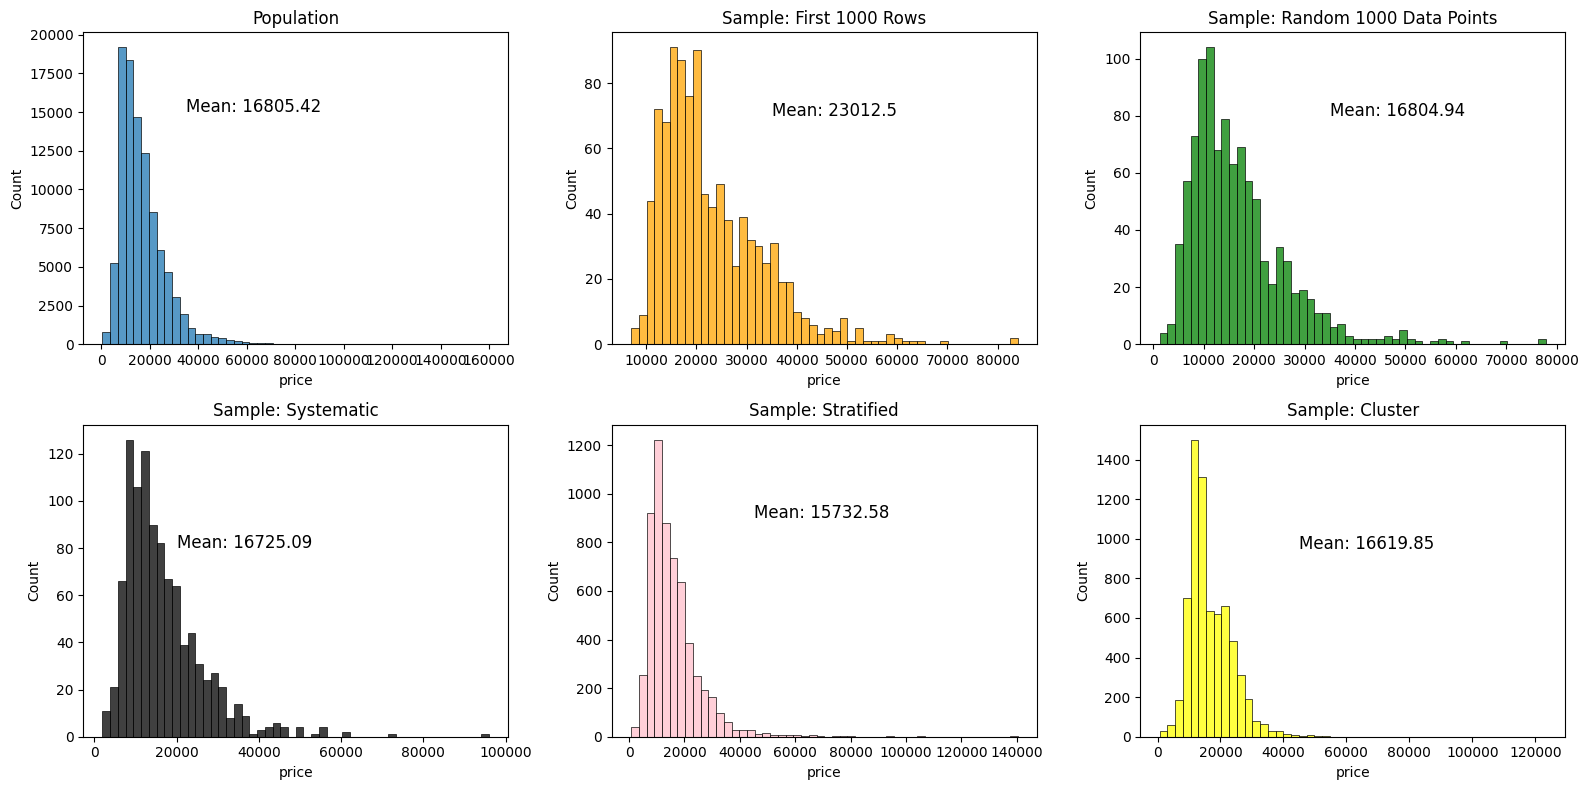

In [17]:
# display histograms for 'price' column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

sns.histplot(x='price', data=cars,bins=50, ax=axes[0,0])
axes[0,0].set_title('Population')
axes[0,0].text(35000, 15000, f"Mean: {pop_mean}",fontsize=12)

sns.histplot(x='price', data=cars_sample_first_1000,bins=50, color='orange', ax=axes[0,1])
axes[0,1].set_title('Sample: First 1000 Rows')
axes[0,1].text(35000, 70, f"Mean: {sample_mean}",fontsize=12)

sns.histplot(x='price', data=cars_sample_random_1000,bins=50, color='g', ax=axes[0,2])
axes[0,2].set_title('Sample: Random 1000 Data Points')
axes[0,2].text(35000, 80, f"Mean: {sample_mean_random}",fontsize=12)

sns.histplot(x='price', data=cars_sample_systematic_shuffled,bins=50, color='k', ax=axes[1,0])
axes[1,0].set_title('Sample: Systematic')
axes[1,0].text(20000, 80, f"Mean: {sample_mean_systematic}",fontsize=12)

sns.histplot(x='price', data=cars_sample_strat,bins=50, color='pink', ax=axes[1,1])
axes[1,1].set_title('Sample: Stratified')
axes[1,1].text(45000, 900, f"Mean: {sample_mean_strat}",fontsize=12)

sns.histplot(x='price', data=cars_sample_cluster,bins=50, color='yellow', ax=axes[1,2])
axes[1,2].set_title('Sample: Cluster')
axes[1,2].text(45000, 950, f"Mean: {sample_mean_cluster}",fontsize=12)

fig.tight_layout()
plt.savefig('all_methods.jpg')
plt.show()


In [18]:
print(f"Population Mean: {pop_mean} \n\
Sample Mean (First 1000): {sample_mean} \n\
Sample Mean (Random): {sample_mean_random}")

Population Mean: 16805.42 
Sample Mean (First 1000): 23012.5 
Sample Mean (Random): 16804.94


# Sample Sizes

In [19]:
sample_sizes = [50, 100, 500, 1000, 5000]
sample_means = []
pop_mean = round(cars['price'].mean(),2)
pop = len(cars)
print(f"Population: {pop} - Mean= {pop_mean}")
for n in sample_sizes:
    sample_mean = round(cars['price'].sample(n=n, random_state=21).mean(),2)
    sample_means.append(sample_mean)
    print(f"n = {n} - Sample Mean= {sample_mean}")

Population: 99178 - Mean= 16805.42
n = 50 - Sample Mean= 17947.6
n = 100 - Sample Mean= 17295.63
n = 500 - Sample Mean= 17061.04
n = 1000 - Sample Mean= 16804.94
n = 5000 - Sample Mean= 16670.82


In [20]:
# Relative errors
sample_sizes_str = [str(n) for n in sample_sizes]
rel_err = {}
for n,m in dict(zip(sample_sizes_str, sample_means)).items():
    rel_err_pct = abs(pop_mean-m) / pop_mean * 100
    rel_err[n] = rel_err_pct
rel_err

{'50': 6.796497796544212,
 '100': 2.916975594778368,
 '500': 1.5210568971201115,
 '1000': 0.0028562213857170095,
 '5000': 0.8009320802455313}

In [21]:
sample_sizes_rng = range(1,5001)
for n in sample_sizes_rng:
    sample_mean = round(cars['price'].sample(n=n, random_state=21).mean(),2)
    sample_means.append(sample_mean)
 
# Relative errors
sample_sizes_str = [str(n) for n in sample_sizes_rng]
sample_dict = dict(zip(sample_sizes_str, sample_means))

rel_err = {}
for n,m in sample_dict.items():
    rel_err_pct = abs(pop_mean - m) / pop_mean * 100
    rel_err[n] = rel_err_pct

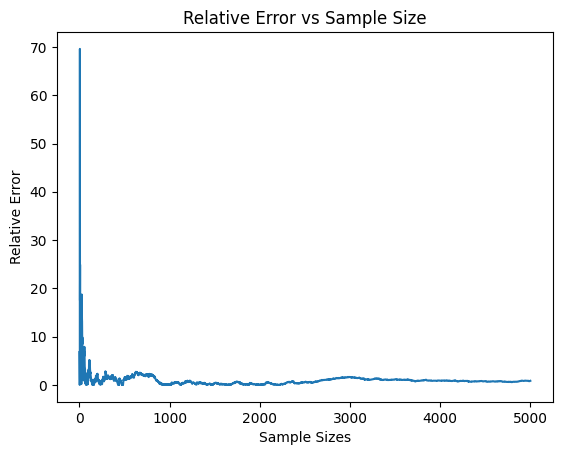

In [22]:
plt.plot(list(rel_err.values()))
plt.title('Relative Error vs Sample Size')
plt.xlabel('Sample Sizes')
plt.ylabel('Relative Error')

plt.show()

# Sampling Distribution - Simulating the Samples, with size 50, 1000 times

In [23]:
# create sample means for size 50 1000 times
mean_cars_1000 = []
for i in range(1000):
    sample = cars['price'].sample(n=50)
    mean_cars_1000.append(sample.mean())

# display first 10 sample means
mean_cars_1000[:10]

[16057.68,
 15205.4,
 18853.48,
 19572.26,
 16471.0,
 19522.96,
 14344.76,
 15690.8,
 15407.8,
 18632.1]

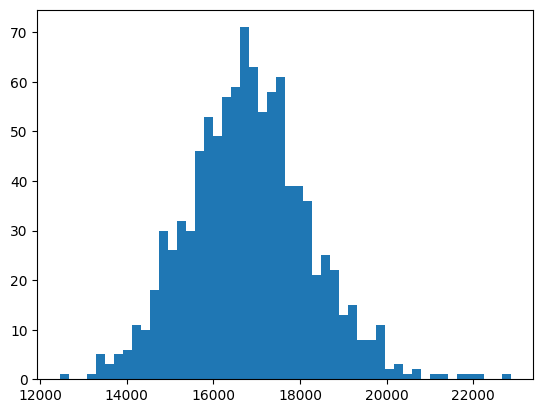

In [24]:
# display distribution of sample means for size 50
plt.hist(mean_cars_1000, bins=50)
plt.show()

Note: A sampling distribution is a distribution of replicates of point estimates.

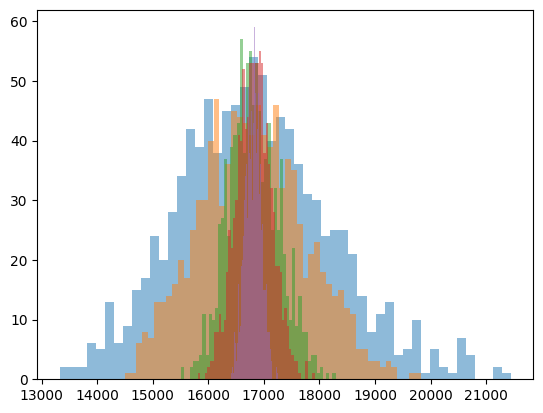

In [25]:
# display distributions of sample means for varying sample sizes [50, 100, 500, 1000, 5000]
for n in sample_sizes:
    mean_cars = []
    for i in range(1000):
        sample = cars['price'].sample(n=n)
        mean_cars.append(sample.mean())
    
    plt.hist(mean_cars, bins=50, alpha=0.5)
plt.show()